<a href="https://colab.research.google.com/github/susmitha8176/Ml/blob/master/MLAll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.svm import LinearSVC # Linear Support Vector Classigication
from sklearn.svm import NuSVC

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
#sol = pd.read_csv('/content/drive/My Drive/fastai-v3/data/bears/featuretrain.csv')
exp = pd.read_csv('/content/drive/My Drive/example_submission.csv')

In [3]:
train.info()
test.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [4]:
sum(train['IsAlert'] == 0)

254544

First Model



Data preprocessing

In [0]:
new_df = pd.DataFrame() 

In [6]:
noalert = train.index[train['IsAlert'] == 0]
turnnoalert = train.iloc[noalert-1][train['IsAlert'] == 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
for i in turnnoalert.index: # Return 500ms before and after the moment
    new_df = new_df.append(train[i-5:i+6])

In [0]:
new_df = new_df.drop_duplicates() 

In [9]:
new_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
604323,510,1193,1,32.0303,7.68265,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,323,2,2,1,64,0.0,91.40,0.175,240,3.01875,0,1792,0,29.9,0,4,15.8303
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604314,510,1184,0,31.9667,9.17322,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,90.94,0.175,240,3.01875,0,1780,0,29.5,0,4,15.8482
604315,510,1185,0,31.9291,15.50140,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,90.91,0.175,240,3.01875,0,1777,0,29.5,0,4,15.8472
604316,510,1186,0,31.9820,8.30669,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,91.00,0.280,240,3.01875,0,1795,0,29.5,0,4,15.8759
604317,510,1187,0,31.9516,9.91952,688,87.2093,0.089515,684,87.7193,0,17.807,222.11,0,0,0.016379,327,2,2,1,64,0.0,91.01,0.175,240,3.01875,0,1784,0,29.5,0,4,15.8589



# Feature Engineering


In [0]:
pcadata = new_df.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns


# Standarization

In [12]:
X_scaled = preprocessing.scale(pcadata) 
pcadata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37421 entries, 604323 to 604318
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      37421 non-null  float64
 1   P2      37421 non-null  float64
 2   P3      37421 non-null  int64  
 3   P4      37421 non-null  float64
 4   P5      37421 non-null  float64
 5   P6      37421 non-null  int64  
 6   P7      37421 non-null  float64
 7   P8      37421 non-null  int64  
 8   E1      37421 non-null  float64
 9   E2      37421 non-null  float64
 10  E3      37421 non-null  int64  
 11  E4      37421 non-null  int64  
 12  E5      37421 non-null  float64
 13  E6      37421 non-null  int64  
 14  E7      37421 non-null  int64  
 15  E8      37421 non-null  int64  
 16  E9      37421 non-null  int64  
 17  E10     37421 non-null  int64  
 18  E11     37421 non-null  float64
 19  V1      37421 non-null  float64
 20  V2      37421 non-null  float64
 21  V3      37421 non-null  int64

# Principle Component Analysis

In [0]:
pca=PCA() 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 

In [14]:
#let's check the shape of X_pca array
print ("shape of X_pca", X_pca.shape)

shape of X_pca (37421, 30)


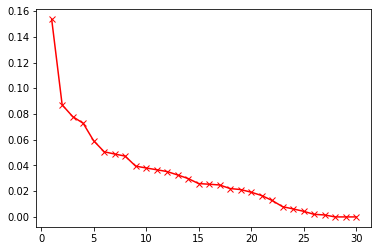

In [15]:
#%%
# Scree Plot
y = pca.explained_variance_ratio_

x = np.array([i for i in range(1, len(y)+1)])

plt.plot(x, y, 'r-x')

In [16]:
# Filter principle components
sum(pca.explained_variance_ratio_[:14])
X_pca = X_pca[:,:14] # Slice the first 14 features
X_pca.shape 

(37421, 14)

In [18]:
X_pca # Training features


array([[-1.13162853,  0.31998431,  0.26156361, ...,  1.02433172,
         0.70943025, -0.18363423],
       [-1.19089936,  0.24896352,  0.27907797, ...,  0.74432583,
         0.81958233, -0.25328004],
       [-1.19688915,  0.18795301,  0.28791467, ...,  0.49758852,
         0.90339316, -0.27264132],
       ...,
       [-1.15137249,  0.33964321,  0.32035685, ...,  0.96243759,
         0.66141226, -0.15012464],
       [-1.11689356,  0.29833156,  0.32107332, ...,  0.81488074,
         0.71706924, -0.1312757 ],
       [-1.14711508,  0.20941089,  0.3323469 , ...,  0.55608563,
         0.87515175, -0.21948589]])

In [19]:
new_df.IsAlert # Target features

604323    1
604324    1
604325    1
604326    1
604327    1
         ..
604314    0
604315    0
604316    0
604317    0
604318    1
Name: IsAlert, Length: 37421, dtype: int64

Modeling

In [20]:
# Logistic Regression Cross Validation
clf_CV = LogisticRegressionCV(cv=10, random_state=0, solver = 'liblinear') # Model Setting
clf_CV.fit(X_pca, new_df.IsAlert) # Model Fitting

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [21]:
# Evalution

clf_CV.score(X_pca, new_df.IsAlert) 


0.6460276315437856

In [22]:
# Confustion matrix evaluation

clf_cv_pred = clf_CV.predict(X_pca)
len(clf_cv_pred == 1)
#sum(clf_cv_pred == 0)

37421

In [23]:
sum(clf_cv_pred == 0)

5276

In [24]:
confusion_matrix(new_df.IsAlert, clf_cv_pred)



array([[ 4066, 12036],
       [ 1210, 20109]])

In [25]:
sum(new_df.IsAlert == 1)

21319

In [26]:
roc_auc_score(new_df.IsAlert, clf_cv_pred)


0.5978791659850288

Try Another Models

NAIVE-Bayes

In [0]:
# Cross Validated Naive Bayes Model
skf = StratifiedKFold(n_splits=10)
params = {}
nb = GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, new_df.IsAlert, random_state = 42)


In [0]:
gs.fit(x_train, y_train)
gs.cv_results_
gs.score(X_pca, new_df.IsAlert)
gs_predict = gs.predict(X_pca)

In [30]:
confusion_matrix(new_df.IsAlert, gs_predict)


array([[ 4026, 12076],
       [ 2181, 19138]])

In [0]:
roc_auc_score(new_df.IsAlert, gs_predict)
#nb.fit(x_train, y_train)
#nb.score(x_test, y_test)

0.5738639710706295

In [0]:
# Cross Validated  Random Forest
grid_forest = RandomForestClassifier(random_state = 42)
hyperparams = [{'n_estimators':[5, 10 ,50]}]
grid_search = GridSearchCV(grid_forest, hyperparams, cv = 10, scoring = 'neg_mean_squared_error')


In [32]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [0]:
selected_model = grid_search.best_estimator_

In [35]:
print ('Grid winner', selected_model.score(x_test, y_test))
selected_model.score(X_pca, new_df.IsAlert)

Grid winner 0.7658187259512612


0.9414499879746666

In [0]:
randomfpred = grid_search.predict(X_pca)


In [37]:
confusion_matrix(new_df.IsAlert, randomfpred)

array([[14535,  1567],
       [  624, 20695]])

In [0]:
roc_auc_score(new_df.IsAlert, randomfpred)

0.9367066154890232

In [0]:
import pickle
from joblib import dump, load


In [0]:
dump(grid_search, 'randomforest.joblib')
rf_2 = load('randomforest.joblib') 
rf_2.best_estimator_.score(X_pca, new_df.IsAlert)
randomfpred_2 = rf_2.predict(X_pca)

In [40]:
confusion_matrix(new_df.IsAlert, randomfpred_2)


array([[14535,  1567],
       [  624, 20695]])

In [41]:
roc_auc_score(new_df.IsAlert, randomfpred_2)

0.9367066154890232

# Support Vector Machine & Neural Network

In [0]:
lisvc = LinearSVC(random_state=42, tol=1e-5)
svcgridsearch = GridSearchCV(lisvc, cv = skf, param_grid = params, return_train_score = True)
svcgridsearch.fit(x_train, y_train) # Failed to convergence


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=1e-05, verbose=0),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
svcgridsearch.cv_results_
svcgridsearch.score(X_pca, new_df.IsAlert)
lisvc_predict = svcgridsearch.predict(X_pca)


In [0]:
confusion_matrix(new_df.IsAlert, lisvc_predict)

array([[ 4008, 12094],
       [ 1216, 20103]])

In [0]:
roc_auc_score(new_df.IsAlert, lisvc_predict)

0.595937427932066

In [0]:
#accuracy 64.43%

# Epsilon - Support Vecto Regression

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)

In [0]:
svrgridsearch = GridSearchCV(svr, cv = skf, param_grid = params, return_train_score = True)
svrgridsearch.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.2, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
svrgridsearch.cv_results_
svrgridsearch.score(X_pca, new_df.IsAlert)
svr_predict = svrgridsearch.predict(X_pca)

In [0]:
svr_predict


array([0.76921565, 0.7748565 , 0.78159718, ..., 0.7642754 , 0.77192306,
       0.7838266 ])

In [0]:
roc_auc_score(new_df.IsAlert, svr_predict)

0.7192060139804022

# C - Support Vector Regression

In [0]:
from sklearn.svm import SVC 

In [0]:
svc = SVC(gamma='auto')
svcgridsearch = GridSearchCV(svc, cv = skf, param_grid = params, return_train_score = True)
svcgridsearch.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
svcgridsearch.cv_results_
svcgridsearch.score(X_pca, new_df.IsAlert)
svc_predict = svcgridsearch.predict(X_pca)

In [0]:
confusion_matrix(new_df.IsAlert, svc_predict)

array([[ 4358, 11744],
       [  398, 20921]])

In [0]:
roc_auc_score(new_df.IsAlert, svc_predict)

0.6259904078244471

# Neural Network

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
nn1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nngridsearch = GridSearchCV(nn1, cv = skf, param_grid = params, return_train_score = True)
nngridsearch.fit(x_train, y_train) 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(5, 2),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False

In [0]:
nngridsearch.cv_results_
nngridsearch.score(X_pca, new_df.IsAlert)
nn_predict = nngridsearch.predict(X_pca)


In [0]:
confusion_matrix(new_df.IsAlert, nn_predict)

array([[ 4205, 11897],
       [ 1205, 20114]])

In [0]:
roc_auc_score(new_df.IsAlert, nn_predict)

0.6023126662815139

#Model2

Use rolling means and std of each attribute as new features

In [42]:
train_new = pd.DataFrame() # New df
#train_new
for i in range(0, max(train.TrialID)+1): # Within each trial
    temp_data = train[train['TrialID'] == i] # Create a temporary df for each trial
    for j in list(train)[3:]: # For all the attributes of each trial
#        print (train_2[train_2['TrialID'] == i][j])
        temp_data['m{}'.format(j)] = train[train['TrialID'] == i][j].rolling(window = 5).mean() # Create the Rolling mean
        temp_data['sd{}'.format(j)] = train[train['TrialID'] == i][j].rolling(window = 5).std() # Create the Rolling Std
    train_new = train_new.append(temp_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train_new = train_new.fillna(0) # Missing Value

#Data partition

In [0]:
train_new = train_new.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns

X_train, X_test, y_train, y_test = train_test_split(train_new, train.IsAlert, test_size = 0.2, random_state = 23)

In [45]:
train_new

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,mP1,sdP1,mP2,sdP2,mP3,sdP3,mP4,sdP4,mP5,sdP5,...,mE3,sdE3,mE4,sdE4,mE5,sdE5,mE6,sdE6,mE7,sdE7,mE8,sdE8,mE9,sdE9,mE10,sdE10,mE11,sdE11,mV1,sdV1,mV2,sdV2,mV3,sdV3,mV4,sdV4,mV5,sdV5,mV6,sdV6,mV7,sdV7,mV8,sdV8,mV9,sdV9,mV10,sdV10,mV11,sdV11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000e+00,0.00000,0.000000
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757,34.43622,0.173867,12.397738,2.881599,1400.0,0.000000,42.8571,0.000000,0.290601,0.000000,...,1.0,0.000000e+00,-20.0,0.0,0.015875,0.0,324.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000e+00,57.0,0.000000,0.0,0.0,101.994,0.043932,0.231,0.145576,752.0,0.000000,5.99375,0.000000,0.0,0.000000e+00,2011.0,5.099020,0.0,0.0,13.40,0.000000,0.0,0.0,4.0,0.000000e+00,14.77786,0.013039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113,32.00594,0.015251,12.199390,4.141035,696.0,142.407865,89.4444,19.778809,0.094185,0.017054,...,0.0,6.322027e-08,0.0,0.0,0.016379,0.0,322.8,0.447214,2.0,0.0,2.0,0.0,1.0,7.450581e-09,64.0,0.000001,0.0,0.0,91.378,0.092033,0.196,0.046957,240.0,0.000041,3.01875,0.000001,0.0,1.580507e-08,1794.2,3.834058,0.0,0.0,29.84,0.371484,0.0,0.0,4.0,3.204616e-08,15.82584,0.011552
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018,32.01616,0.017366,11.173110,2.933390,748.0,116.275535,82.2222,16.149330,0.087958,0.013924,...,0.0,6.322027e-08,0.0,0.0,0.016379,0.0,322.6,0.547723,2.0,0.0,2.0,0.0,1.0,7.450581e-

#Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 50, random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
forest.score(X_test, y_test)

0.9891615508083332

In [0]:
for_predict = forest.predict(X_test)

In [49]:
# Confusion Matrix
confusion_matrix(y_test, for_predict)

array([[49663,  1247],
       [   63, 69893]])

In [50]:
#AUC score
roc_auc_score(y_test, for_predict)

0.987302614234641

In [0]:
from sklearn.linear_model import LogisticRegression

In [52]:
logr = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [53]:
logr.score(X_test, y_test)


0.6120745288170371

In [0]:
logr_pred = logr.predict(X_test)

In [55]:
confusion_matrix(y_test, logr_pred)

array([[21363, 29547],
       [17340, 52616]])

#Naïve Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb2 = GaussianNB()
nb2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
nb2.score(X_test, y_test)

0.6286300531166746

In [0]:
nb2_pred = nb2.predict(X_test)

In [60]:
confusion_matrix(y_test, nb2_pred)

array([[44303,  6607],
       [38279, 31677]])

In [61]:
roc_auc_score(y_test, nb2_pred)

0.6615175785943694

#Neural Network

With four hidden layers 90 - 70 - 50 - 30

In [0]:
from sklearn.neural_network import MLPClassifier

In [63]:
nn2 = MLPClassifier(solver='adam', alpha=1e-5,activation = 'logistic',hidden_layer_sizes=(90, 70, 50, 30), random_state=1)
nn2.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(90, 70, 50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
nn2_predict = nn2.predict(X_test)


In [65]:
nn2.score(X_test, y_test)

0.8347922492677842

In [66]:
confusion_matrix(y_test, nn2_predict)

array([[41678,  9232],
       [10736, 59220]])

In [67]:
roc_auc_score(y_test, nn2_predict)

0.8325962434798789

#Model & Data exportation

In [0]:
train_new['IsAlert'] = train['IsAlert']

In [0]:
from joblib import dump, load

In [0]:
from google.colab import drive

In [71]:
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
base_dir = root_dir + 'fastai-v3/'

In [0]:
from pathlib import Path
path = Path(base_dir + 'data/bears')
dest = path/'featuretrain.csv'
dest.mkdir(parents=True, exist_ok=True)

In [0]:
train_new.to_csv('featuredtrain.csv') # Dataset exportation

In [75]:
dump(forest, 'mstdforest.joblib') # Model exportation
dump(nn2, 'mstdnn.joblib')

['mstdnn.joblib']

In [76]:
t_sc = preprocessing.scale(train_new) 
pca_2=PCA() 
pca_2.fit(t_sc) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
t_pca=pca_2.transform(t_sc)

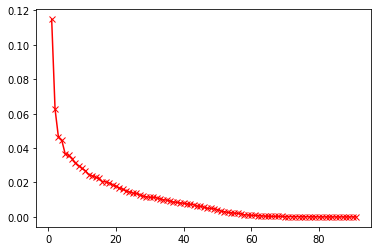

In [78]:
y = pca_2.explained_variance_ratio_

x = np.array([i for i in range(1, len(y)+1)])

plt.plot(x, y, 'r-x')

In [79]:
sum(pca_2.explained_variance_ratio_[:30])

0.8191932024944611

In [80]:
t_pca = t_pca[:,:14]
t_pca.shape

(604329, 14)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load

In [0]:
test = pd.read_csv('/content/gdrive/My Drive/test.csv')
#sol = pd.read_csv('/content/drive/My Drive/fastai-v3/data/bears/featuretrain.csv')
exp = pd.read_csv('/content/gdrive/My Drive/example_submission.csv')

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


In [0]:
# Choose the three models with the best performance
rf_pca = load('randomforest.joblib') 
rf_mstd = load('mstdforest.joblib')
nn_mstd = load('mstdnn.joblib')

In [86]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
len(test)

120840

In [0]:
pcatest = test.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns

# Standarization

In [0]:
test_scaled = preprocessing.scale(pcatest) 


# Principle Component Analysis

In [0]:
pca=PCA() 
pca.fit(pcatest) 
test_pca=pca.transform(pcatest) 
#let's check the shape of X_pca array

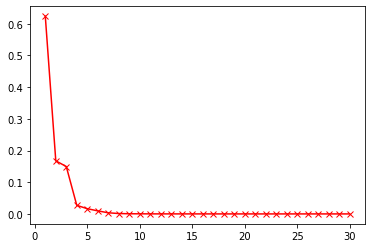

In [90]:
# Scree Plot
y = pca.explained_variance_ratio_

x = np.array([i for i in range(1, len(y)+1)])

plt.plot(x, y, 'r-x')

In [91]:
test_pca = test_pca[:,:14] # Slice the first 14 features
test_pca.shape 

(120840, 14)

In [92]:
sum(pca.explained_variance_ratio_[:14])

0.9999269193884548

In [93]:
sum(exp['Prediction'] == 0)

120840

In [94]:
test_pca

array([[-3.55849741e+02, -7.07435598e+01, -3.33924808e+02, ...,
        -6.30864693e+00, -5.90323061e+00, -2.98151665e-01],
       [-3.55848992e+02, -7.07436676e+01, -3.33924144e+02, ...,
        -6.28262657e+00, -5.89895117e+00, -2.64818695e-01],
       [-3.59829045e+02, -7.08141938e+01, -3.34356948e+02, ...,
        -6.32021372e+00, -5.88595977e+00, -2.69345686e-01],
       ...,
       [ 1.09702325e+03, -1.57795017e+02, -1.74826911e+02, ...,
        -1.20403477e+01, -4.98590940e+00, -6.04513347e+00],
       [ 1.09672027e+03, -1.59842179e+02, -1.89793318e+02, ...,
        -1.20056919e+01, -4.99105516e+00, -6.00603708e+00],
       [ 1.09672027e+03, -1.59842179e+02, -1.89793318e+02, ...,
        -1.20056919e+01, -4.99105516e+00, -6.00603708e+00]])

In [95]:
exp['Prediction']

0         0
1         0
2         0
3         0
4         0
         ..
120835    0
120836    0
120837    0
120838    0
120839    0
Name: Prediction, Length: 120840, dtype: int64

In [96]:
len(test_pca)

120840

# Evaluate the first model

In [97]:
rf_pca.best_estimator_.score(test_pca, exp['Prediction'])


0.713232373386296

In [0]:
randomfpred = rf_pca.predict(test_pca)

In [100]:
confusion_matrix(exp['Prediction'], randomfpred)

array([[86187, 34653],
       [    0,     0]])

In [0]:
roc_auc_score(exp['Prediction'], randomfpred)

# Feature Engineering

In [0]:
test_new = pd.DataFrame() # New df

In [106]:
#train_new
for i in range(0, max(test.TrialID)+1): # Within each trial
    temp_data = test[test['TrialID'] == i] # Create a temporary df for each trial
    for j in list(test)[3:]: # For all the attributes of each trial
#        print (train_2[train_2['TrialID'] == i][j])
        temp_data['m{}'.format(j)] = test[test['TrialID'] == i][j].rolling(window = 5).mean() # Create the Rolling mean
        temp_data['sd{}'.format(j)] = test[test['TrialID'] == i][j].rolling(window = 5).std() # Create the Rolling Std
    test_new = test_new.append(temp_data)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
test_new = test_new.fillna(0) # Missing Value
test_new = test_new.drop(columns = ['TrialID', 'ObsNum', 'IsAlert']) # Drop unneccessary columns


In [108]:
test_new

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,mP1,sdP1,mP2,sdP2,mP3,sdP3,mP4,sdP4,mP5,sdP5,...,mE3,sdE3,mE4,sdE4,mE5,sdE5,mE6,sdE6,mE7,sdE7,mE8,sdE8,mE9,sdE9,mE10,sdE10,mE11,sdE11,mV1,sdV1,mV2,sdV2,mV3,sdV3,mV4,sdV4,mV5,sdV5,mV6,sdV6,mV7,sdV7,mV8,sdV8,mV9,sdV9,mV10,sdV10,mV11,sdV11
0,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
2,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
4,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459,38.15268,0.271313,12.481360,1.690192,1000.0,0.000000,60.00000,0.000000,0.302277,0.000000e+00,...,4.0,0.0,6.4,2.190890,0.015736,2.760522e-04,328.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,64.6,0.547723,0.0,0.0,108.602,0.043818,0.028,3.834058e-02,255.0,0.000000,4.50625,0.0,0.0,0.0,2130.4,3.714835,0.0,0.0,17.6,0.0,0.0,0.0,4.0,0.0,16.16934,0.017762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850,37.45590,0.050866,14.453510,5.615060,1061.6,232.234364,58.59584,11.870188,0.123246,1.065868e-02,...,0.0,0.0,0.0,0.000002,0.015900,3.450652e-05,366.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,71.0,0.000000,0.0,0.0,0.000,0.000000,-0.070,2.870529e-09,246.0,8.215838,0.00000,0.0,0.0,0.0,663.6,4.159327,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.69732,0.007396
120836,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840,37.39966,0.140441,13.132988,6.958748,976.8,189.618564,62.93022,9.691968,0.127138,8.702777e-03,...,0.0,0.0,0.0,0.000002,0.015888,2.817446e-05,366.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,71.0,0.000000,0.0,0.0,0.000,0.000000,-0.070,2.870529e-09,246.0,8.215838,0.00000,0.0,0.0,0.0,662.2,5.069517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.69370,0.008773
120837,36.9131,9.26657,892,67.2646,0.

In [0]:
from sklearn.metrics import f1_score


In [111]:
rf_mstd.score(test_new, exp['Prediction'])

0.20978152929493546

In [0]:
randomfpred2 = rf_mstd.predict(test_new)

In [114]:
confusion_matrix(exp['Prediction'], randomfpred2)

array([[25350, 95490],
       [    0,     0]])

In [0]:
roc_auc_score(exp['Prediction'], randomfpred2)

In [117]:
f1_score(exp['Prediction'], randomfpred2)

0.0

In [119]:
nn_mstd.score(test_new, exp['Prediction'])

0.29018536908308507

In [0]:
nnpred = nn_mstd.predict(test_new)

In [121]:
confusion_matrix(exp['Prediction'], nnpred)

array([[35066, 85774],
       [    0,     0]])

In [0]:
roc_auc_score(exp['Prediction'], nnpred)

In [123]:
f1_score(exp['Prediction'], nnpred)

0.0

#ROC curve plotting


In [0]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class

In [126]:
plot_1 = roc_curve(exp['Prediction'], randomfpred2)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [128]:
#plot_1 = roc_curve(sol['Prediction'], randomfpred2)
plot_2 = roc_curve(exp['Prediction'], nnpred)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [129]:
plot_3 = roc_curve(exp['Prediction'], randomfpred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [130]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
lw = 2

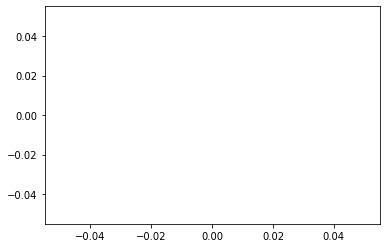

In [132]:
plt.plot(plot_1[0], plot_1[1], color='darkorange',
         lw=lw, label='Random Forest ROC curve (area = {0:0.2f})'
               ''.format(auc(plot_1[0], plot_1[1])))

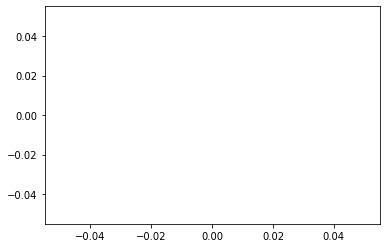

In [133]:
plt.plot(plot_2[0], plot_2[1], color='red',
         lw=lw, label='Neural Network ROC curve (area = {0:0.2f})'
               ''.format(auc(plot_2[0], plot_2[1])))

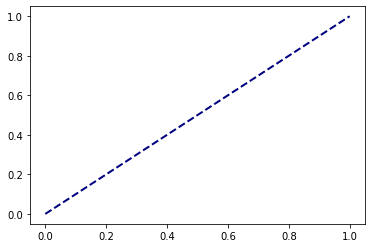

In [134]:
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

No handles with labels found to put in legend.


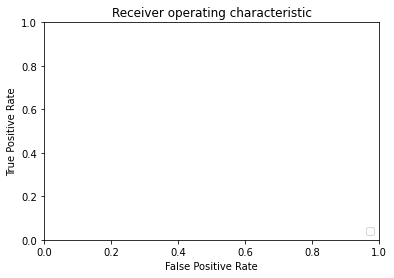

In [136]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
sol = pd.read_csv('/content/featuredtrain.csv')

In [138]:
sol.head()

,Unnamed: 0,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,mP1,sdP1,mP2,sdP2,mP3,sdP3,mP4,sdP4,mP5,...,sdE3,mE4,sdE4,mE5,sdE5,mE6,sdE6,mE7,sdE7,mE8,sdE8,mE9,sdE9,mE10,sdE10,mE11,sdE11,mV1,sdV1,mV2,sdV2,mV3,sdV3,mV4,sdV4,mV5,sdV5,mV6,sdV6,mV7,sdV7,mV8,sdV8,mV9,sdV9,mV10,sdV10,mV11,sdV11,IsAlert
0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0
1,1,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0
2,2,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0
3,3,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0
4,4,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757,34.43622,0.173867,12.397738,2.881599,1400.0,0.0,42.8571,0.0,0.290601,...,0.0,-20.0,0.0,0.015875,0.0,324.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,57.0,0.0,0.0,0.0,101.994,0.043932,0.231,0.145576,752.0,0.0,5.99375,0.0,0.0,0.0,2011.0,5.09902,0.0,0.0,13.4,0.0,0.0,0.0,4.0,0.0,14.77786,0.013039,0


In [139]:
len(sol)

604329